#### **Adding BMW DataSet to our Python NoteBook and Study the Data**

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('BMW sales data (2010-2024).csv')
df = df.sort_values(by='Year')
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


#### **Checking Dataset**

In [2]:
df.head(10)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,7 Series,2010,Asia,Black,Diesel,Automatic,2.0,82885,76202,7859,High
1,i8,2010,Middle East,Grey,Petrol,Automatic,4.0,98514,37949,2278,Low
2,3 Series,2010,Europe,Grey,Petrol,Manual,2.0,6546,71897,6116,Low
3,i3,2010,Europe,Silver,Electric,Manual,3.9,38587,34345,2869,Low
4,i8,2010,South America,Black,Hybrid,Automatic,4.7,16020,102215,5006,Low
5,X3,2010,North America,Red,Electric,Automatic,2.5,111391,49103,248,Low
6,X5,2010,Middle East,Silver,Electric,Manual,4.8,147683,45556,9866,High
7,X5,2010,South America,Grey,Electric,Manual,4.4,171395,96875,7816,High
8,X6,2010,Europe,Silver,Petrol,Automatic,4.1,29730,48287,9342,High
9,X5,2010,Europe,Blue,Electric,Manual,1.6,85694,110534,5068,Low


#### **Plot for Distribution of Sales Volume**

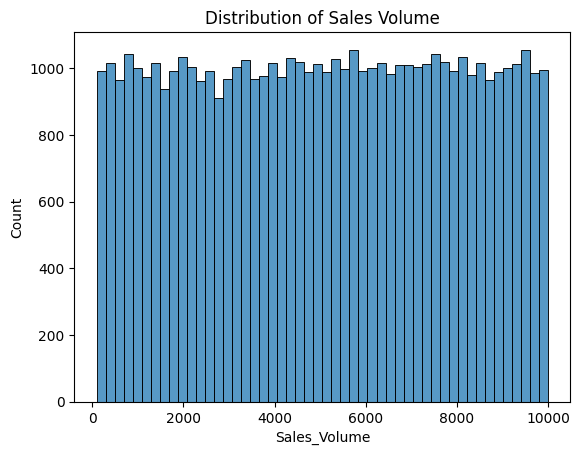

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Sales_Volume'], bins=50)
plt.title("Distribution of Sales Volume")
plt.show()

#### **All Unique BMW Models**

In [4]:
df['Model'].unique()

array(['7 Series', 'i8', '3 Series', 'i3', 'X3', 'X5', 'X6', '5 Series',
       'M3', 'M5', 'X1'], dtype=object)

#### **Taking BMW-M3 Model From Models**

In [5]:
M3 = df.loc[(df['Model'] == 'M3') & (df['Region'] == 'Asia')].reset_index(drop=True)
M3.drop(['Region', 'Mileage_KM', 'Sales_Classification'], axis=1, inplace=True)
M3.head(10)

,Model,Year,Color,Fuel_Type,Transmission,Engine_Size_L,Price_USD,Sales_Volume
0,M3,2010,Blue,Diesel,Automatic,4.9,88744,3933
1,M3,2010,White,Petrol,Manual,2.4,72890,182
2,M3,2010,Red,Petrol,Automatic,2.0,53753,6041
3,M3,2010,Silver,Petrol,Automatic,4.4,41843,8281
4,M3,2010,Black,Petrol,Automatic,2.9,71208,1411
5,M3,2010,White,Diesel,Manual,2.1,87728,3988
6,M3,2010,Red,Electric,Manual,3.8,48745,4007
7,M3,2010,Red,Diesel,Automatic,3.2,87239,5537
8,M3,2010,Blue,Diesel,Manual,3.8,119315,1152
9,M3,2010,Red,Petrol,Manual,2.7,36685,311


#### **Checking all the unique colors given in DataSet**

In [6]:
M3enc = M3.copy()
M3['Color'].unique()

array(['Blue', 'White', 'Red', 'Silver', 'Black', 'Grey'], dtype=object)

#### **Encoding the following columns using LabelEncoding**

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
conv = ['Color', 'Fuel_Type', 'Transmission']

for col in conv:
    M3enc[col] = le.fit_transform(M3enc[col])
M3enc.head(10)

,Model,Year,Color,Fuel_Type,Transmission,Engine_Size_L,Price_USD,Sales_Volume
0,M3,2010,1,0,0,4.9,88744,3933
1,M3,2010,5,3,1,2.4,72890,182
2,M3,2010,3,3,0,2.0,53753,6041
3,M3,2010,4,3,0,4.4,41843,8281
4,M3,2010,0,3,0,2.9,71208,1411
5,M3,2010,5,0,1,2.1,87728,3988
6,M3,2010,3,1,1,3.8,48745,4007
7,M3,2010,3,0,0,3.2,87239,5537
8,M3,2010,1,0,1,3.8,119315,1152
9,M3,2010,3,3,1,2.7,36685,311


#### **Scaling following column using MinMaxScaling**

In [8]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
M3enc['Price_USD_Scaled'] = mms.fit_transform(M3enc[['Price_USD']])
M3enc.head(10)

,Model,Year,Color,Fuel_Type,Transmission,Engine_Size_L,Price_USD,Sales_Volume,Price_USD_Scaled
0,M3,2010,1,0,0,4.9,88744,3933,0.653817
1,M3,2010,5,3,1,2.4,72890,182,0.476263
2,M3,2010,3,3,0,2.0,53753,6041,0.261941
3,M3,2010,4,3,0,4.4,41843,8281,0.128557
4,M3,2010,0,3,0,2.9,71208,1411,0.457426
5,M3,2010,5,0,1,2.1,87728,3988,0.642439
6,M3,2010,3,1,1,3.8,48745,4007,0.205855
7,M3,2010,3,0,0,3.2,87239,5537,0.636962
8,M3,2010,1,0,1,3.8,119315,1152,0.996192
9,M3,2010,3,3,1,2.7,36685,311,0.070791


#### **Split the DataSet into Train Set and Test Set**

In [9]:
from sklearn.model_selection import train_test_split
M3enc.drop('Price_USD', axis=1, inplace=True)
x = M3enc.drop('Sales_Volume', axis=1)
y= M3enc['Sales_Volume']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train

,Model,Year,Color,Fuel_Type,Transmission,Engine_Size_L,Price_USD_Scaled
694,M3,2023,3,2,0,2.0,0.294543
638,M3,2022,3,2,0,3.2,0.014895
133,M3,2012,2,3,1,2.9,0.379982
355,M3,2016,5,3,1,1.8,0.391529
55,M3,2010,5,2,0,3.3,0.845259
...,...,...,...,...,...,...,...
71,M3,2011,3,0,0,3.2,0.317669
106,M3,2012,0,1,0,4.5,0.376522
270,M3,2015,0,0,0,4.0,0.745058
435,M3,2018,4,0,0,2.1,0.522382


#### **Training the Model using LinearRegression**

In [10]:
a = [x_train, x_test]
for x in a:
    x.drop('Model', axis=1, inplace=True)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred

array([4606.40416465, 5032.33945523, 4493.32625644, 4986.12057028,
       5035.48851741, 4756.31716908, 4626.97115347, 4782.13743093,
       5090.41299852, 5469.54473191, 5070.32085085, 5433.56626646,
       5030.88588257, 5763.26619657, 5072.86478403, 4869.50173456,
       4945.01768112, 4759.31770658, 4601.29508268, 4813.53186978,
       4246.86437915, 5577.3535006 , 4604.02120423, 5316.44309249,
       5087.32072782, 5767.69838623, 4902.29355065, 5800.42022776,
       5608.66968729, 5349.58721772, 4721.51998643, 4443.96175374,
       4949.8418838 , 4948.06687502, 5415.10197615, 4910.61440083,
       4644.91918318, 4719.62055905, 4730.57896181, 4735.25304525,
       4719.54561626, 5504.94609301, 5220.66342657, 5540.51886515,
       4876.60013875, 4809.97655165, 5424.30197562, 5481.07974013,
       5643.32166034, 5359.36485128, 4890.25195787, 5449.81312491,
       5579.10554774, 4761.67879866, 4639.82171005, 5653.92686835,
       5339.61587365, 5106.94205754, 5005.97462126, 4562.50425

#### **Using the Root-Mean-Square-Error to see the Average Magnitude of Error of Models**

##### **Of Linear Regression**

In [11]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mse, rmse

(7667460.547671017, np.float64(2769.017975324649))

##### **Of Decision Tree**

In [12]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(x_train, y_train)
dtr_pred = dtr.predict(x_test)

from sklearn.metrics import mean_squared_error
dtr_mse = mean_squared_error(y_test, dtr_pred)
dtr_rmse = np.sqrt(dtr_mse)
dtr_rmse

np.float64(3969.274197362303)

##### **Of RandomForest**

In [13]:
from sklearn.ensemble import RandomForestRegressor
fr = RandomForestRegressor(n_estimators=30, random_state=42)
fr.fit(x_train, y_train)
fr_pred = fr.predict(x_test)

from sklearn.metrics import mean_squared_error
fr_mse = mean_squared_error(y_test, fr_pred)
fr_rmse = np.sqrt(fr_mse)
fr_rmse

np.float64(3029.4512693574857)

#### **Giving New Data to Linear Regression to predict it's value**

In [16]:
# New data for prediction
new_data = pd.DataFrame({
    'Model': ['M3'],
    'Year': [2011],
    'Color': [2],
    'Fuel_Type': [1],
    'Transmission': [0],
    'Engine_Size_L': [3.5],
    'Price_USD_Scaled': [0.5]
})

new_data.drop('Model', axis=1, inplace=True)

predicted_sales = lr.predict(new_data)
print(predicted_sales)


[4633.89190014]
